##### Exercise: Constraint optimization problem

$$ \min_{a,b>0} \int_0^1 (f(z) - \beta(z|a,b))^2 \;dz$$

where

- $Z = XY$
- $f(z)=\int_z^1 f_Y(y)f_X(z/y) \frac{1}{y} \;dy$
- $X \sim \beta(a_1,b_1)$ and $Y \sim \beta(a_2, b_2)$

Test the following cases: 
- $(a_1, b_1) = (a_2, b_2)=(2, 2)$
- $(a_1, b_1)=(9, 2), \; (a_2, b_2)=(9, 2)$ 

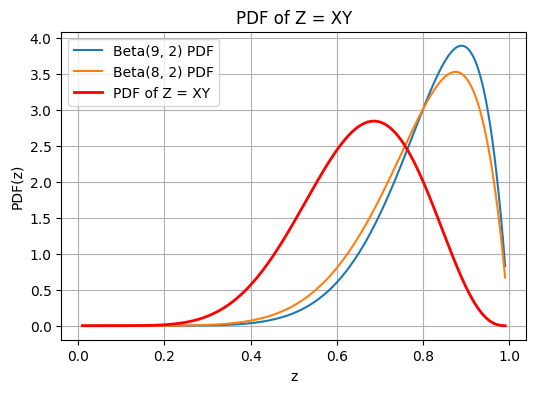

In [16]:
# Draw the pdf of Z=XY, where X and Y are independent beta random variables with parameters a and b
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def beta_product_pdf(z, a1, b1, a2, b2, num_points=1000):
    """Compute the PDF of Z = XY where X and Y are independent Beta(a, b) random variables."""
    pdf_z = np.zeros_like(z)
    x = np.linspace(0.01, 0.99, num_points)
    # dx = x[1] - x[0]
    
    for i, zi in enumerate(z):
        integrand = beta.pdf(x, a1, b1) * beta.pdf(zi / x, a2, b2) / x
        # integrand[x == 0] = 0  # Avoid division by zero
        pdf_z[i] = np.trapezoid(integrand, x)
    
    return pdf_z

# Parameters for the Beta distribution
a1, b1 = 9, 2
a2, b2 = 8, 2
fig = plt.figure(figsize=(6, 4))
z = np.linspace(0.01, 0.99, 1000)
pdf_x = beta.pdf(z, a1, b1)
plt.plot(z, pdf_x, label=f'Beta({a1}, {b1}) PDF')
pdf_y = beta.pdf(z, a2, b2)
plt.plot(z, pdf_y, label=f'Beta({a2}, {b2}) PDF')
pdf_z = beta_product_pdf(z, a1, b1, a2, b2)
plt.plot(z, pdf_z, label='PDF of Z = XY', color='red', lw=2)
plt.legend()
plt.grid
plt.title('PDF of Z = XY')
plt.xlabel('z')
plt.ylabel('PDF(z)')
plt.grid(True)

plt.show()